# 1.0 Prepare the data

## Read data from dataset

In [1]:
import nltk
import pandas as pd
import numpy as np

# read data from dataset
data = pd.read_csv('car_evaluation.csv')

# print dataset value
data.head(5)


,buy_price,maintenance_costs,num_doors,persons,trunk_size,safety,overall_score
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [2]:
# Display no of rows
print("Number of rows: ", data.shape)

Number of rows:  (1728, 7)


## Rename the columns

In [3]:
data = data.rename(columns={"buy_price": "Price"})
data = data.rename(columns={"maintenance_costs": "Maintenance Costs"})
data = data.rename(columns={"num_doors": "No of Doors"})
data = data.rename(columns={"persons": "No of Passengers"})
data = data.rename(columns={"trunk_size": "Trunk Size"})
data = data.rename(columns={"safety": "Safety"})
data = data.rename(columns={"overall_score": "Acceptability"})

In [4]:
# Updated table columns
data.head(5)

,Price,Maintenance Costs,No of Doors,No of Passengers,Trunk Size,Safety,Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Data Preprocessing

Preprocess the data read from dataset to improve the accuracy of the model.

## Check for missing attribute

In [5]:
print("Total Number of missing value found: \n")
print(data.isnull().sum())

Total Number of missing value found: 

Price                0
Maintenance Costs    0
No of Doors          0
No of Passengers     0
Trunk Size           0
Safety               0
Acceptability        0
dtype: int64


No missing values was found inside the dataset.

In [6]:
# display datatype for all table variables
data.dtypes

Price                object
Maintenance Costs    object
No of Doors          object
No of Passengers     object
Trunk Size           object
Safety               object
Acceptability        object
dtype: object

## Make the data homogeneous

In [7]:
# Make all the data from the dataset become lowercase

data['Price'] = data['Price'].str.lower()
data['Maintenance Costs'] = data['Maintenance Costs'].str.lower()
data['No of Doors'] = data['No of Doors'].str.lower()
data['No of Passengers'] = data['No of Passengers'].str.lower()
data['Trunk Size'] = data['Trunk Size'].str.lower()
data['Safety'] = data['Safety'].str.lower()
data['Acceptability'] = data['Acceptability'].str.lower()

## Identify duplicate rows

In [8]:
# Check no of rows containing duplicate data
duplicate_rows_data = data[data.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_data.shape)


Number of duplicate rows:  (0, 7)


In [9]:
# Display no of rows for each column
data.count()

Price                1728
Maintenance Costs    1728
No of Doors          1728
No of Passengers     1728
Trunk Size           1728
Safety               1728
Acceptability        1728
dtype: int64

Since there are no any duplicate data, dropping process is no needed.

## Encode the data into numeric format

Encode the string variables into numeric format. This is because, machine can only understand number instad of string and character.

Display variable for each column inside the dataset

In [10]:
# Display variable for Price
data['Price'].value_counts()

high     432
vhigh    432
med      432
low      432
Name: Price, dtype: int64

In [11]:
# Display variable for Maintenance Costs
data['Maintenance Costs'].value_counts()

high     432
vhigh    432
med      432
low      432
Name: Maintenance Costs, dtype: int64

In [12]:
# Display variable for No of Doors
data['No of Doors'].value_counts()

3        432
5more    432
4        432
2        432
Name: No of Doors, dtype: int64

In [13]:
# Display variable for No of Passengers
data['No of Passengers'].value_counts()

4       576
more    576
2       576
Name: No of Passengers, dtype: int64

In [14]:
# Display variable for Trunk Size
data['Trunk Size'].value_counts()

med      576
small    576
big      576
Name: Trunk Size, dtype: int64

In [15]:
# Display variable for Safety
data['Safety'].value_counts()

high    576
med     576
low     576
Name: Safety, dtype: int64

In [16]:
# Display variable for Acceptability
data['Acceptability'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: Acceptability, dtype: int64

In [17]:
object_data = data.select_dtypes(include=['object']).copy()

# Encode Price from string to number
object_data["Price"]=object_data["Price"].replace({"low":1})
object_data["Price"]=object_data["Price"].replace({"med":2})
object_data["Price"]=object_data["Price"].replace({"high":3})
object_data["Price"]=object_data["Price"].replace({"vhigh":4})

# Encode Maintenance Costs from string to number
object_data["Maintenance Costs"]=object_data["Maintenance Costs"].replace({"low":1})
object_data["Maintenance Costs"]=object_data["Maintenance Costs"].replace({"med":2})
object_data["Maintenance Costs"]=object_data["Maintenance Costs"].replace({"high":3})
object_data["Maintenance Costs"]=object_data["Maintenance Costs"].replace({"vhigh":4})

# Encode Trunk Size from string to number
object_data["Trunk Size"]=object_data["Trunk Size"].replace({"small":1})
object_data["Trunk Size"]=object_data["Trunk Size"].replace({"med":2})
object_data["Trunk Size"]=object_data["Trunk Size"].replace({"big":3})

# Encode No of Doors Costs from string to number
object_data["No of Doors"]=object_data["No of Doors"].replace({"2":1})
object_data["No of Doors"]=object_data["No of Doors"].replace({"3":2})
object_data["No of Doors"]=object_data["No of Doors"].replace({"4":3})
object_data["No of Doors"]=object_data["No of Doors"].replace({"5more":4})


# Encode No of Passengers Costs from string to number
object_data["No of Passengers"]=object_data["No of Passengers"].replace({"2":1})
object_data["No of Passengers"]=object_data["No of Passengers"].replace({"4":2})
object_data["No of Passengers"]=object_data["No of Passengers"].replace({"more":3})

# Encode Safety from string to number
object_data["Safety"]=object_data["Safety"].replace({"low":1})
object_data["Safety"]=object_data["Safety"].replace({"med":2})
object_data["Safety"]=object_data["Safety"].replace({"high":3})

# Encode Acceptability from string to number
object_data["Acceptability"]=object_data["Acceptability"].replace({"unacc":1})
object_data["Acceptability"]=object_data["Acceptability"].replace({"acc":2})
object_data["Acceptability"]=object_data["Acceptability"].replace({"good":3})
object_data["Acceptability"]=object_data["Acceptability"].replace({"vgood":4})

object_data.loc[object_data['Acceptability']==4]


,Price,Maintenance Costs,No of Doors,No of Passengers,Trunk Size,Safety,Acceptability
1097,2,2,1,2,3,3,4
1106,2,2,1,3,3,3,4
1124,2,2,2,2,3,3,4
1130,2,2,2,3,2,3,4
1133,2,2,2,3,3,3,4
...,...,...,...,...,...,...,...
1700,1,1,3,3,3,3,4
1715,1,1,4,2,2,3,4
1718,1,1,4,2,3,3,4
1724,1,1,4,3,2,3,4


## Detect Outlier inside dataset 

Detect and remove outlier from the dataset can help to improve accuracy of the machine learning model.

Detect Outlier:

Method 1: Scatter Plot

Scatter Plot able to show the relationship between two quatitative vrraibles.

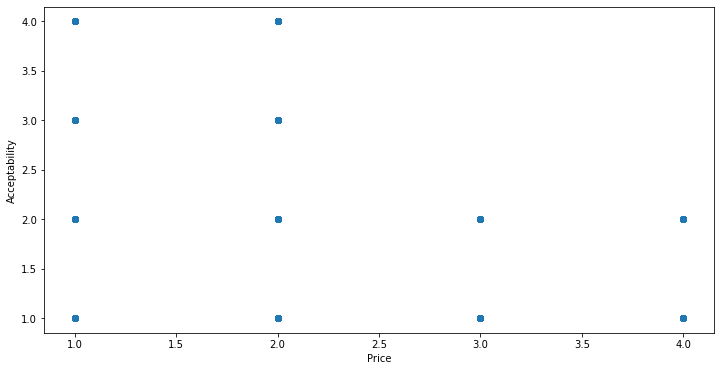

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(object_data['Price'], object_data['Acceptability'])
ax.set_xlabel('Price')
ax.set_ylabel('Acceptability')
plt.show()

## Validify the correctness of the datatype

Based on the graph we are able to see the plot located at the most top is not following the shape of others plot. So it will be detected as outliers inside our dataset. I am going to remove it by calculating z-score to find out total number of outliers.

Method to detect outlier: Z-score

The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. 

In [19]:
from scipy import stats
import numpy as np

# Calculate Z-score for each data 
z = np.abs(stats.zscore(object_data))
print(z)

[[1.34164079 1.34164079 1.34164079 ... 1.22474487 1.22474487 0.56034935]
 [1.34164079 1.34164079 1.34164079 ... 1.22474487 0.         0.56034935]
 [1.34164079 1.34164079 1.34164079 ... 1.22474487 1.22474487 0.56034935]
 ...
 [1.34164079 1.34164079 1.34164079 ... 1.22474487 1.22474487 0.56034935]
 [1.34164079 1.34164079 1.34164079 ... 1.22474487 0.         2.1405814 ]
 [1.34164079 1.34164079 1.34164079 ... 1.22474487 1.22474487 3.49104677]]


Data with the Z-score grether than 3 will be recognize as outlier.

In [20]:
# Code display all the Z-score which is greater than 3
threshold = 3
print(np.where(z > 3))


(array([1097, 1106, 1124, 1130, 1133, 1148, 1151, 1157, 1160, 1175, 1178,
       1184, 1187, 1205, 1214, 1232, 1238, 1241, 1256, 1259, 1265, 1268,
       1283, 1286, 1292, 1295, 1421, 1430, 1448, 1454, 1457, 1472, 1475,
       1481, 1484, 1499, 1502, 1508, 1511, 1529, 1538, 1556, 1562, 1565,
       1580, 1583, 1589, 1592, 1607, 1610, 1616, 1619, 1637, 1646, 1664,
       1670, 1673, 1688, 1691, 1697, 1700, 1715, 1718, 1724, 1727],
      dtype=int64), array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
      dtype=int64))


There are total of 65 outlier detected from the dataset

In [21]:
# Print no of rows of a database before removing outlier
object_data.shape

(1728, 7)

In [22]:
# Code to remove outlier
# Keep data with z-score less than 3 only
object_data = object_data[(z < 3).all(axis=1)]

# Print no of rows of a database after removing outlier
object_data.shape

(1663, 7)

All vgood for Acceptability has been detected as outlier and removed from the data frame.

In [23]:
# Check total number of vgood in Acceptability

print("vgood: ")
object_data.loc[object_data['Acceptability']==4]

vgood: 


,Price,Maintenance Costs,No of Doors,No of Passengers,Trunk Size,Safety,Acceptability


Below is the Scatter plot that showing the relationship between Price and Acceptability after removing the outliers. We can see that, the plot located as most top just now is completed remove from the dataset.

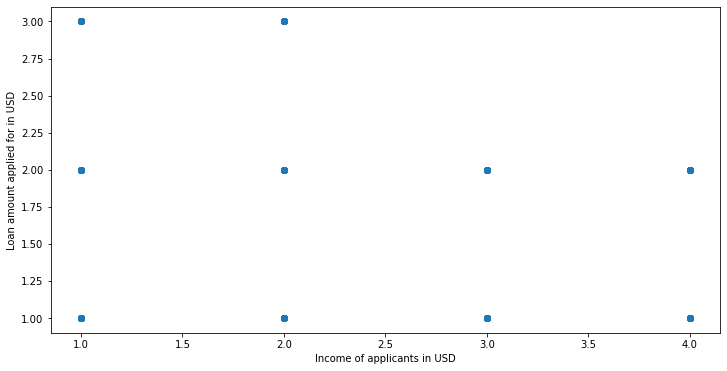

In [24]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(object_data['Price'], object_data['Acceptability'])
ax.set_xlabel('Income of applicants in USD')
ax.set_ylabel('Loan amount applied for in USD')
plt.show()

# 2. Train Model

## Identify feature and label

In [25]:
#x = object_data[['Price', 'Maintenance Costs', 'Trunk Size', 'Safety', 'No of Doors', 'No of Passengers']]
x = object_data[['Price', 'Maintenance Costs', 'Trunk Size', 'No of Doors', 'No of Passengers', 'Safety']]
y = object_data['Acceptability']

## Split data into training and testing sets

To avoid over fitting

70% of data use for training 
30% of data use for testing

In [26]:
# code to split data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#print(X_train_cv.toarray().shape)
y_test.loc[object_data['Acceptability']==4]

Series([], Name: Acceptability, dtype: int64)

## Build Machine Learning Model

In [27]:
# Import neccessary library for Decision Tree classifier
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree Classifier
clf = DecisionTreeClassifier()



Train model using training set

70% from the original dataset

In [28]:
# Train the model using training dataset
clf.fit(X_train, y_train)

DecisionTreeClassifier()

## Test the machine learning model

Perform testing on the machine learning model to see the predicted output based on the test data

In [29]:
X_test.shape

(499, 6)

In [30]:
test = [[1, 1, 3, 2, 3, 3]]
y_pred = clf.predict(X_test)
#y_pred = clf.predict(test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 3, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 2, 2, 1, 1, 1, 1, 3, 1, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 3, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2,

# 3. Access the machine learning model

Access the machine learning by using confusion matrix and calculate accuracy, precision, recall and f1

Accuracy: 0.98

Precision: 
Precision for unacc: 0.9841
Precision for acc: 0.9623
Precision for good: 1.0
Average precision: 0.9821

Recall: 
Recall for unacc: 0.992
Recall for acc: 0.9444
Recall for : 0.9375
Average Recall: 0.958

F1 Score: 0.9699


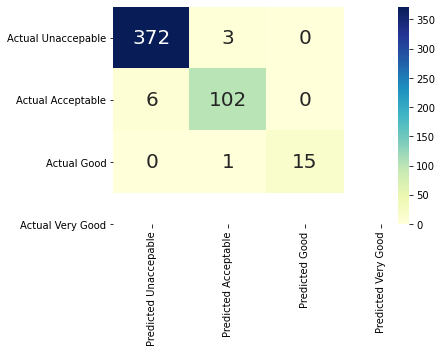

In [31]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['Predicted Unaccepable', 'Predicted Acceptable', 'Predicted Good', 'Predicted Very Good'], yticklabels=['Actual Unaccepable', 'Actual Acceptable', 'Actual Good', 'Actual Very Good'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

a,b,c = cm[0]
d,e,f = cm[1]
g,h,i = cm[2]

a,b,c = cm[0]
d,e,f = cm[1]
g,h,i = cm[2]

accuracy = round((a + e + i) / (a + b + c + d + e + f + g + h + i),4)

# Calculate precision for predicted unacc
precisionUnacc = round((a) / (a + d + g),4)
# Calculate precision for predicted acc
precisionAcc = round((e) / (b + e + h), 4)
# Calculate precision for predicted good
precisionGood = round((i) / (c + f + i), 4)
# Calculate Average precision
averagePrecision = round(((precisionUnacc + precisionAcc + precisionGood) / 3),4)

# Calcuate recall for unacc
recallUnacc = round((a / (a + b + c)),4)
# Calcuate recall for acc
recallAcc = round((e / (d + e + f)),4)
# Calcuate recall for good
recallGood = round((i / (g + h + i)),4)
# Calculate avarage recall
averageRecall = round(((recallUnacc + recallAcc + recallGood) / 3),4)

# Calculate F1 Score
f1 = round(2 * (averagePrecision * averageRecall) / (averagePrecision + averageRecall), 4)

# Print accuracy
print('Accuracy: {}'.format(accuracy))

# Print presicion
print('\nPrecision: ')
print('Precision for unacc: {}'.format(precisionUnacc))
print('Precision for acc: {}'.format(precisionAcc))
print('Precision for good: {}'.format(precisionGood))
print('Average precision: {}' .format(averagePrecision))

# Print recall
print('\nRecall: ')
print('Recall for unacc: {}'.format(recallUnacc))
print('Recall for acc: {}'.format(recallAcc))
print('Recall for : {}'.format(recallGood))
print('Average Recall: {}'.format(averageRecall))

# Print f1 score
print('\nF1 Score: {}'.format(f1))

# # Print accuracy without removing outlier
# dtc = accuracy_score(y_test, y_pred)
# print(dtc)

In [32]:
import pickle

pickle.dump(clf, open('car_acceptability.pkl', 'wb'))